In [1]:
import maximum_expectation_algorithm
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import nibabel as nib
import SimpleITK as sitk
import pandas as pd
import seaborn as sns
import numpy as np 

## Run once for creating masks

In [2]:
### Create Maximum Expextation Segementation
EM = maximum_expectation_algorithm.maximum_expectation_algorithm()

In [3]:
EM.create_masks()

Creating masks....: 100%|██████████| 5/5 [00:00<00:00, 26.48it/s]


100%|██████████| 5/5 [00:00<00:00, 57.19it/s]


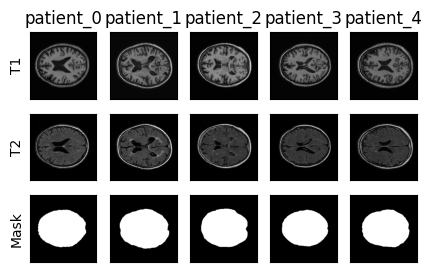

In [4]:
fig, ax = plt.subplots(3, 5, figsize=(5, 3))

layer = 25 
  
for i in tqdm(range(5)):
    mri_T1 = nib.load(os.path.join('..','P2_Data',f'{i}','T1.nii')).get_fdata()
    mri_T2 = nib.load(os.path.join('..','P2_Data',f'{i}','T2_FLAIR.nii')).get_fdata()
    brain_mask = nib.load(os.path.join('..','P2_Data',f'{i}','brainMask.nii')).get_fdata()
        
    titles = ['T1', 'T2', 'Mask']
    for k, images in enumerate([mri_T1, mri_T2, brain_mask]):
            if k == 0:
                ax[k, i].set_title(f'patient_{i}')
            ax[k, i].set_xticks([])
            ax[k, i].set_yticks([])
            if i == 0:
                ax[k, i].set_ylabel(titles[k])
            ax[k, i].imshow(images[:, :, layer], cmap='gray')
            
plt.show()

------------ Patient 0 ---------------------


T1: Expectation Maximination in progress with knn init:  60%|██████    | 60/100 [00:08<00:05,  6.95it/s]
T1+T2: Expectation Maximination in progress with knn init:  67%|██████▋   | 67/100 [00:13<00:06,  4.80it/s]
T1: Expectation Maximination in progress with random init:  47%|████▋     | 47/100 [00:06<00:07,  7.02it/s]
T1+T2: Expectation Maximination in progress with random init:  74%|███████▍  | 74/100 [00:15<00:05,  4.86it/s]


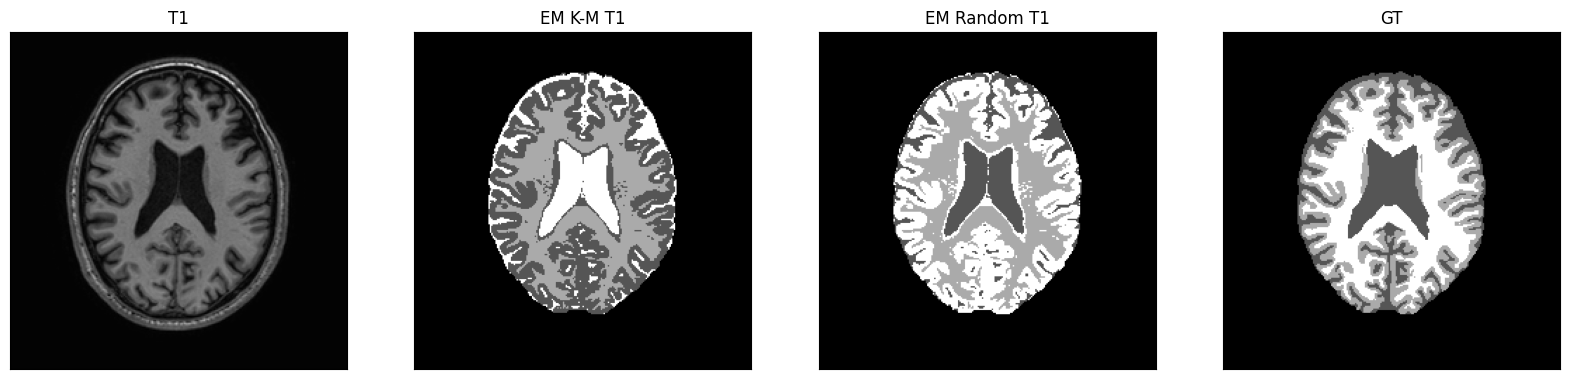

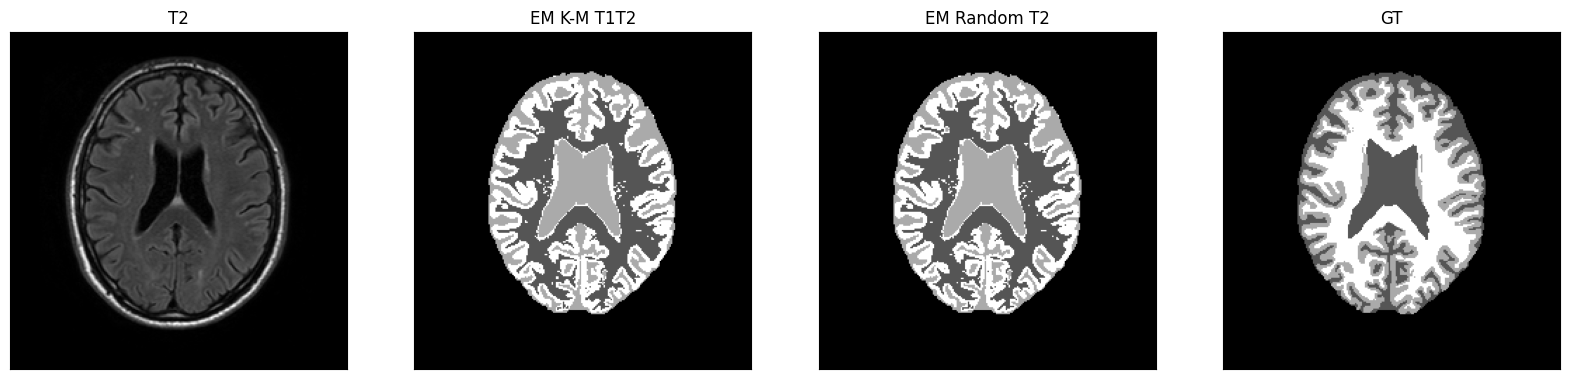

After matching areas


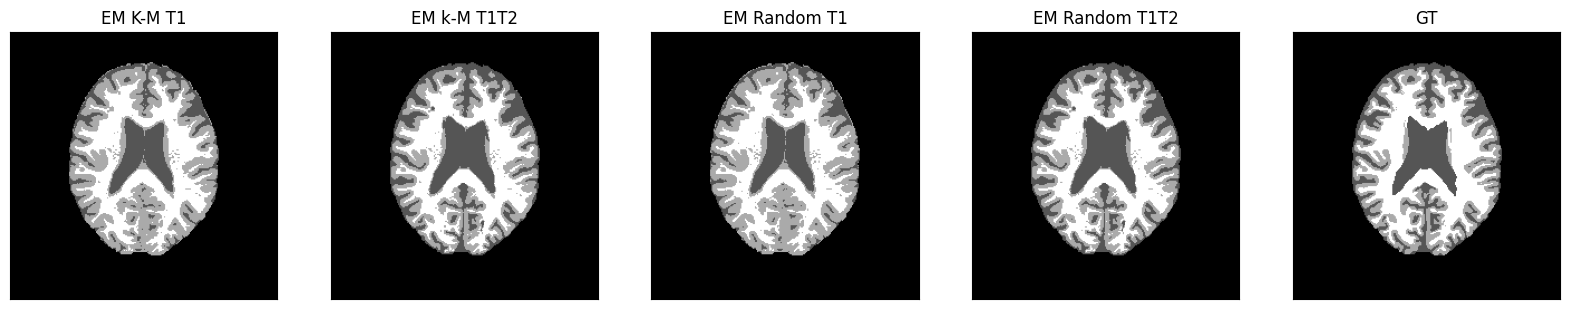

T1 EM Segmentation Kmeans init


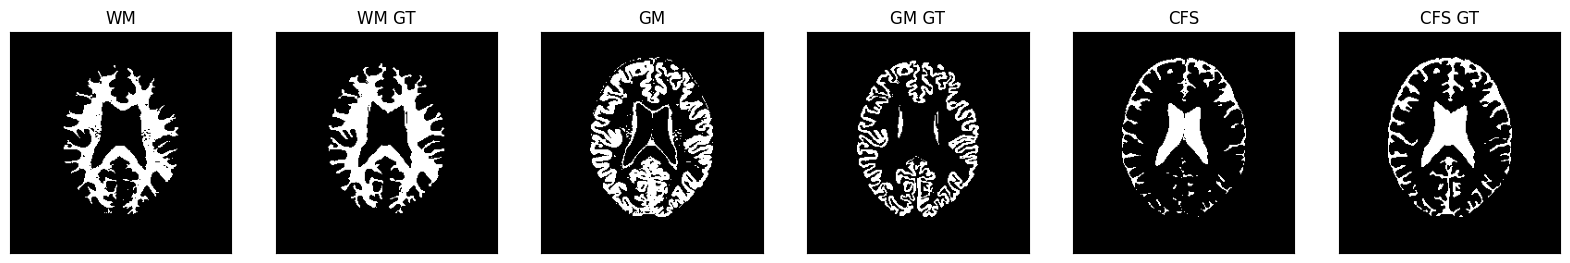

T1+T2 EM Segmentation Kmeans init


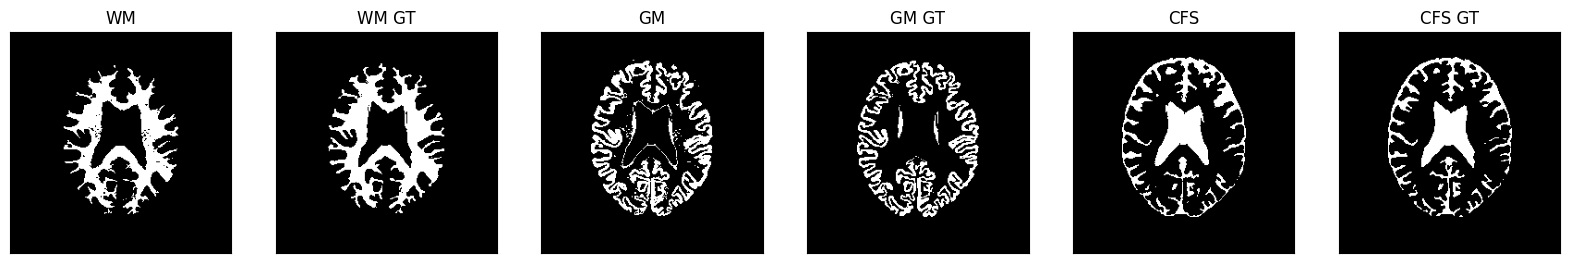

T1 EM Segmentation Random init


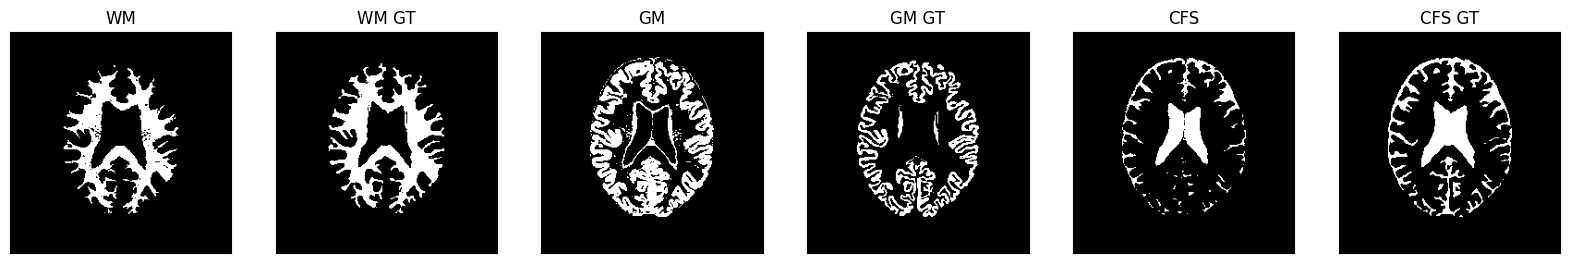

T1+T2 EM Segmentation Random init


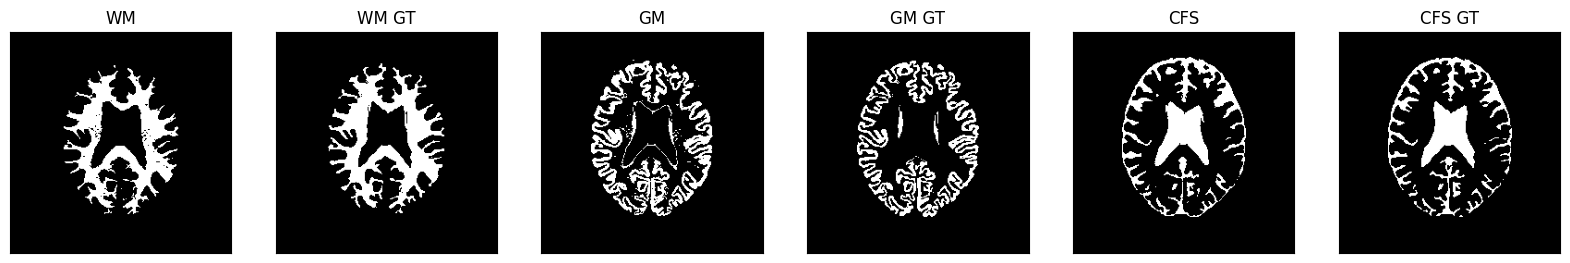

------------ Patient 1 ---------------------


T1: Expectation Maximination in progress with knn init:  39%|███▉      | 39/100 [00:05<00:09,  6.69it/s]
T1+T2: Expectation Maximination in progress with knn init:  62%|██████▏   | 62/100 [00:13<00:08,  4.48it/s]
T1: Expectation Maximination in progress with random init:  51%|█████     | 51/100 [00:07<00:07,  6.69it/s]
T1+T2: Expectation Maximination in progress with random init:  67%|██████▋   | 67/100 [00:15<00:07,  4.39it/s]


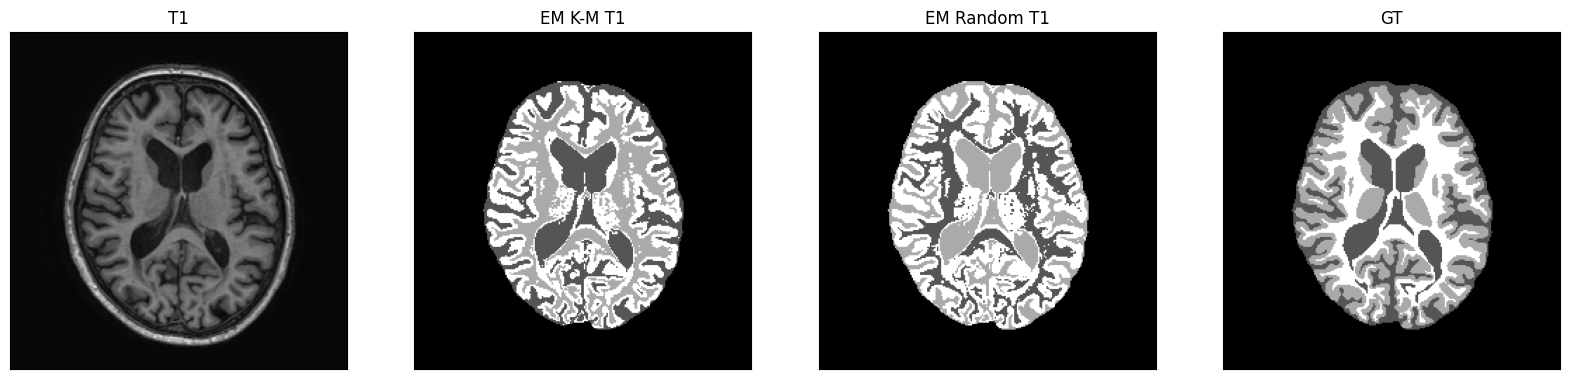

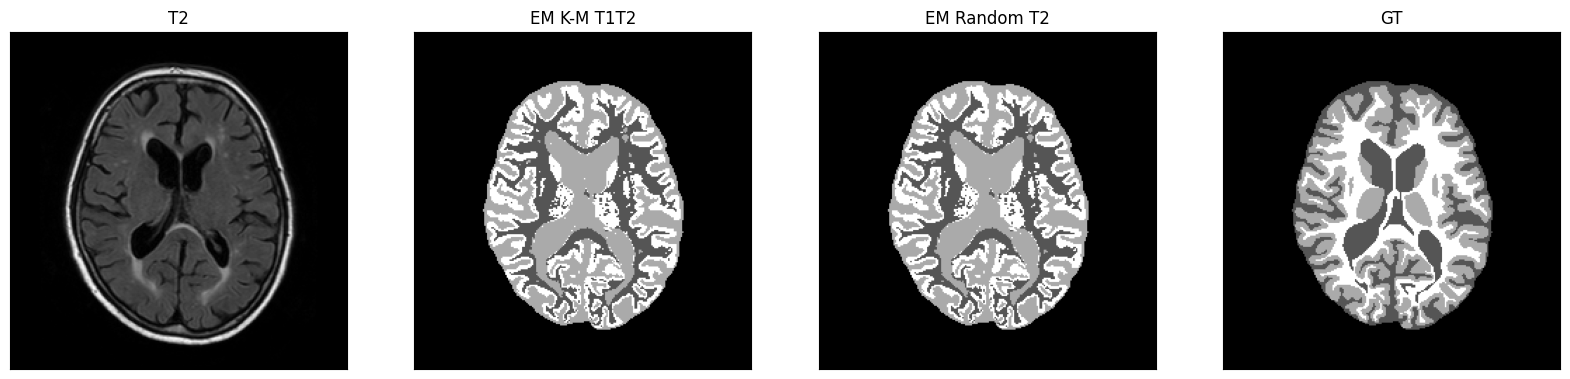

After matching areas


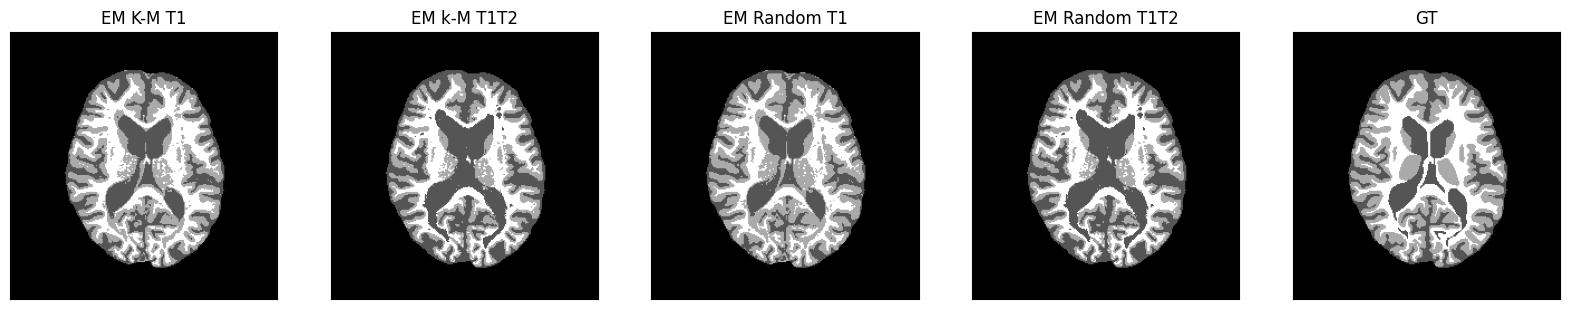

T1 EM Segmentation Kmeans init


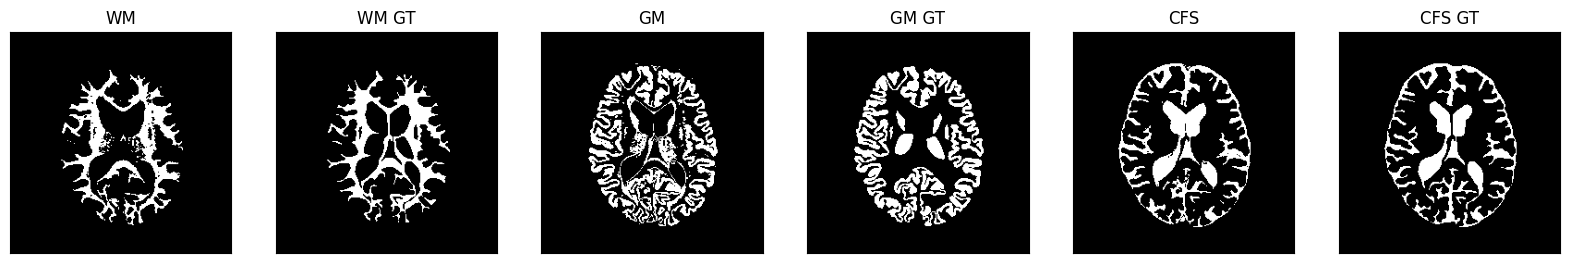

T1+T2 EM Segmentation Kmeans init


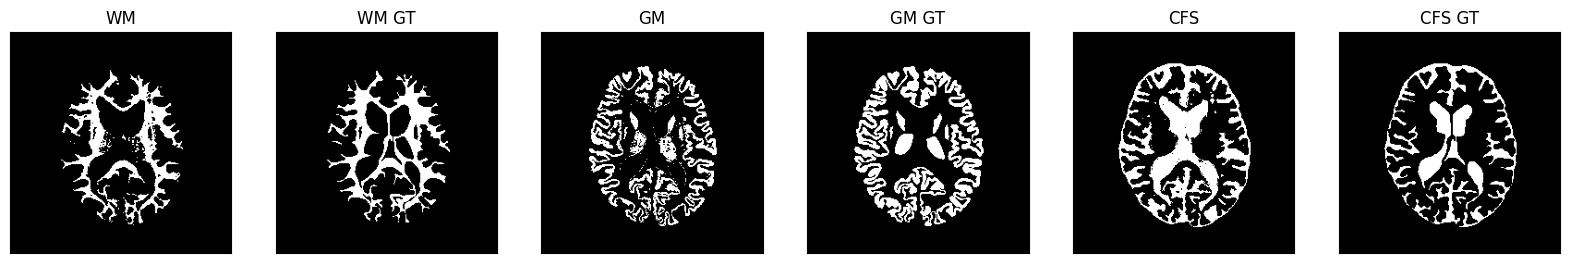

T1 EM Segmentation Random init


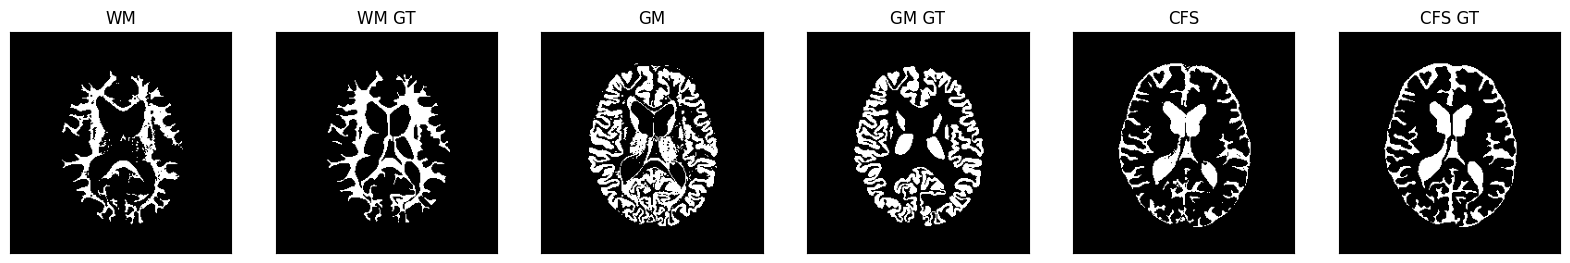

T1+T2 EM Segmentation Random init


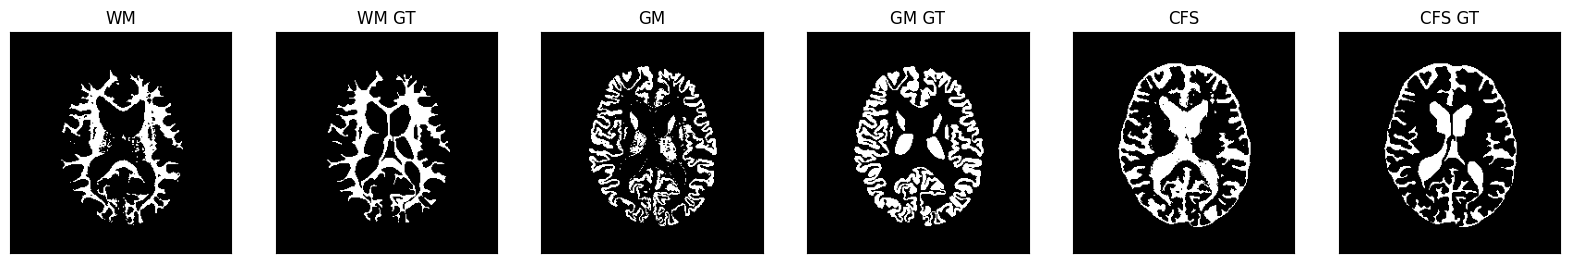

CSF        GM        WM Modalities  Subject Model    Init       Time
0  0.984489  0.666362  0.907930         T1        0    EM  kmeans   8.705028
1  0.896963  0.807961  0.910061      T1+T2        0    EM  kmeans  14.107662
2  0.990264  0.633678  0.912372         T1        0    EM  random   6.757501
3  0.895695  0.811315  0.907447      T1+T2        0    EM  random  15.367771
4  0.829847  0.812013  0.805731         T1        1    EM  kmeans   5.892464
5  0.680543  0.883609  0.834169      T1+T2        1    EM  kmeans  13.986402
6  0.865283  0.771748  0.849433         T1        1    EM  random   7.686237
7  0.680477  0.884844  0.832016      T1+T2        1    EM  random  15.475811

In [5]:
results = []

for i in range(2):
    print(f'------------ Patient {i} ---------------------')

    # Read images
    t1 = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'T1.nii'))
    t2 = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'T2_FLAIR.nii'))
    brain_mask = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'brainMask.nii'))
    ground_truth = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'LabelsForTesting.nii'))

    # Convert images to arrays
    t1_array = sitk.GetArrayFromImage(t1)
    t2_array = sitk.GetArrayFromImage(t2)
    brain_mask_array = sitk.GetArrayFromImage(brain_mask)
    ground_truth_array = sitk.GetArrayFromImage(ground_truth)

    # Perform EM tissue segmentation
    t1_segmentation, t2_segmentation, t1_segmentation_time, t2_segmentation_time = EM.tissue_segmentation(
        t1_array, t2_array, brain_mask_array)
    t1_segmentation_random, t2_segmentation_random, t1_segmentation_random_time, t2_segmentation_random_time = EM.tissue_segmentation(
        t1_array, t2_array, brain_mask_array, type='random')

    # Match predictions with ground truth
    wm_t1, gm_t1, cfs_t1 = EM.match_pred_with_gt(t1_segmentation, ground_truth_array)
    wm_t2, gm_t2, cfs_t2 = EM.match_pred_with_gt(t2_segmentation, ground_truth_array)
    wm_t1_random, gm_t1_random, cfs_t1_random = EM.match_pred_with_gt(t1_segmentation_random, ground_truth_array)
    wm_t2_random, gm_t2_random, cfs_t2_random = EM.match_pred_with_gt(t2_segmentation_random, ground_truth_array)

    # Display plots
    volumes = [t1_array, t1_segmentation, t1_segmentation_random, ground_truth_array]
    names = ['T1', 'EM K-M T1', 'EM Random T1', 'GT']
    EM.get_plots(volumes, names)

    volumes = [t2_array, t2_segmentation, t2_segmentation_random, ground_truth_array]
    names = ['T2', 'EM K-M T1T2', 'EM Random T2', 'GT']
    EM.get_plots(volumes, names)

    print('After matching areas')

    t1_s_m = wm_t1 + gm_t1 + cfs_t1
    t2_s_m = wm_t2 + gm_t2 + cfs_t2
    t1_s_random_m = wm_t1_random + gm_t1_random + cfs_t1_random
    t2_s_random_m = wm_t2_random + gm_t2_random + cfs_t2_random

    volumes = [t1_s_m, t2_s_m, t1_s_random_m, t2_s_random_m, ground_truth_array]
    names = ['EM K-M T1', 'EM k-M T1T2', 'EM Random T1', 'EM Random T1T2', 'GT']
    EM.get_plots(volumes, names)
    
    print('T1 EM Segmentation Kmeans init')
    
    volumes = [wm_t1,np.where(ground_truth_array==3, 1, 0),gm_t1,np.where(ground_truth_array==2, 1, 0),cfs_t1,np.where(ground_truth_array==1, 1, 0)]
    names = ['WM','WM GT','GM','GM GT','CFS','CFS GT']
    EM.get_plots(volumes, names)
    
    print('T1+T2 EM Segmentation Kmeans init')
    
    volumes = [wm_t2,np.where(ground_truth_array==3, 1, 0),gm_t2,np.where(ground_truth_array==2, 1, 0),cfs_t2,np.where(ground_truth_array==1, 1, 0)]
    names = ['WM','WM GT','GM','GM GT','CFS','CFS GT']
    EM.get_plots(volumes, names)
    
    print('T1 EM Segmentation Random init')
    
    volumes = [wm_t1_random,np.where(ground_truth_array==3, 1, 0),gm_t1_random,np.where(ground_truth_array==2, 1, 0),cfs_t1_random,np.where(ground_truth_array==1, 1, 0)]
    names = ['WM','WM GT','GM','GM GT','CFS','CFS GT']
    EM.get_plots(volumes, names)
    
    print('T1+T2 EM Segmentation Random init')
    
    volumes = [wm_t2_random,np.where(ground_truth_array==3, 1, 0),gm_t2_random,np.where(ground_truth_array==2, 1, 0),cfs_t2_random,np.where(ground_truth_array==1, 1, 0)]
    names = ['WM','WM GT','GM','GM GT','CFS','CFS GT']
    EM.get_plots(volumes, names)

    # Calculate Dice scores and store results
    results.append(EM.dice_score(ground_truth_array, t1_s_m) + ['T1', i, 'EM', 'kmeans', t1_segmentation_time])
    results.append(EM.dice_score(ground_truth_array, t2_s_m) + ['T1+T2', i, 'EM', 'kmeans', t2_segmentation_time])
    results.append(EM.dice_score(ground_truth_array, t1_s_random_m) + ['T1', i, 'EM', 'random', t1_segmentation_random_time])
    results.append(EM.dice_score(ground_truth_array, t2_s_random_m) + ['T1+T2', i, 'EM', 'random', t2_segmentation_random_time])

# Create a dataframe to store the results
labels = ['CSF', 'GM', 'WM', 'Modalities', 'Subject', 'Model', 'Init', 'Time']
results = pd.DataFrame(data=results, columns=labels)
results
 

In [6]:

df = pd.melt(results, id_vars=['Modalities', 'Subject', 'Model', 'Init', 'Time'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df['Model'] = df['Model'].str.upper()
df.columns = ['Modalities', 'Subject', 'Model', 'Init', 'Time', 'Tissue', 'Dice']

df

Modalities  Subject Model    Init       Time Tissue      Dice
0         T1        0    EM  kmeans   8.705028    CSF  0.984489
1      T1+T2        0    EM  kmeans  14.107662    CSF  0.896963
2         T1        0    EM  random   6.757501    CSF  0.990264
3      T1+T2        0    EM  random  15.367771    CSF  0.895695
4         T1        1    EM  kmeans   5.892464    CSF  0.829847
5      T1+T2        1    EM  kmeans  13.986402    CSF  0.680543
6         T1        1    EM  random   7.686237    CSF  0.865283
7      T1+T2        1    EM  random  15.475811    CSF  0.680477
0         T1        0    EM  kmeans   8.705028     GM  0.666362
1      T1+T2        0    EM  kmeans  14.107662     GM  0.807961
2         T1        0    EM  random   6.757501     GM  0.633678
3      T1+T2        0    EM  random  15.367771     GM  0.811315
4         T1        1    EM  kmeans   5.892464     GM  0.812013
5      T1+T2        1    EM  kmeans  13.986402     GM  0.883609
6         T1        1    EM  random   7.686237     GM  0.771748
7      T1+T2        1    EM  random  15.475811     GM  0.884844
0         T1        0    EM  kmeans   8.705028     WM  0.907930
1      T1+T2        0    EM  kmeans  14.107662     WM  0.910061
2         T1        0    EM  random   6.757501     WM  0.912372
3      T1+T2        0    EM  random  15.367771     WM  0.907447
4         T1        1    EM  kmeans   5.892464     WM  0.805731
5      T1+T2        1    EM  kmeans  13.986402     WM  0.834169
6         T1        1    EM  random   7.686237     WM  0.849433
7      T1+T2        1    EM  random  15.475811     WM  0.832016

[Text(0.5, 1.0, 'Dice per Modality')]

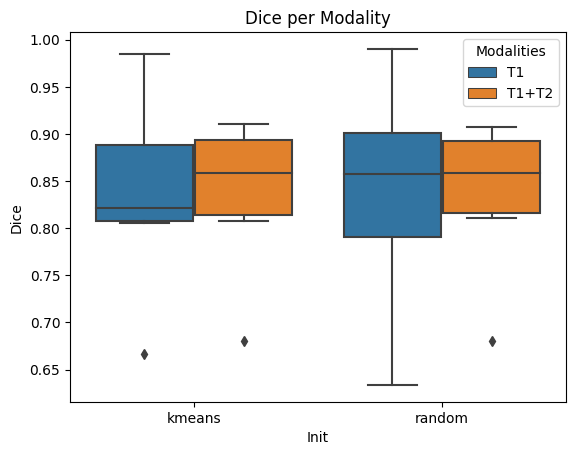

In [7]:
sns.boxplot(
    data=df, x="Init", y="Dice",hue="Modalities"
).set(title='Dice per Modality')

[Text(0.5, 1.0, 'Time per Modality')]

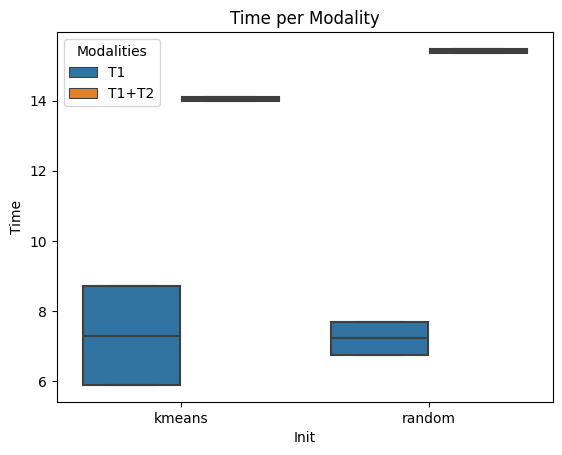

In [8]:
sns.boxplot(
    data=df, x="Init", y="Time",hue="Modalities"
).set(title="Time per Modality")

[Text(0.5, 1.0, 'Dice per Tissue with T1')]

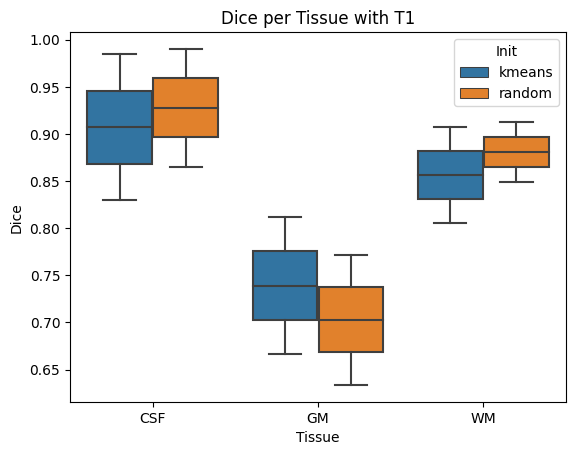

In [9]:
df_ = df.loc[df.Modalities == 'T1']
sns.boxplot(data=df_, x="Tissue", y="Dice", hue="Init").set(title="Dice per Tissue with T1")

[Text(0.5, 1.0, 'Dice per Tissue with T1+T2')]

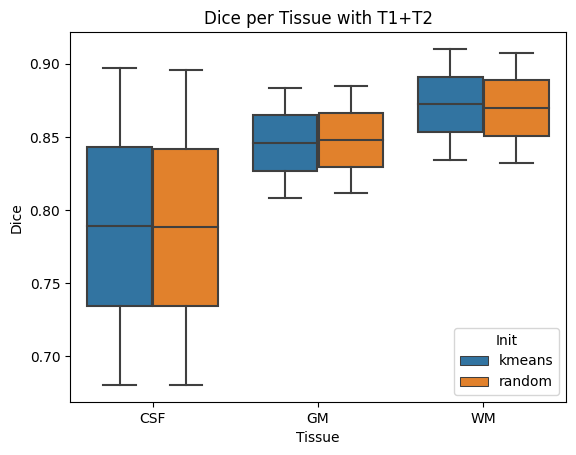

In [10]:
df_ = df.loc[df.Modalities == 'T1+T2']
sns.boxplot(data=df_, x="Tissue", y="Dice", hue="Init").set(title="Dice per Tissue with T1+T2")

------------ Patient 0 ---------------------


T1: Expectation Maximination in progress with knn init:  60%|██████    | 60/100 [00:09<00:06,  6.42it/s]
T1+T2: Expectation Maximination in progress with knn init:  67%|██████▋   | 67/100 [00:15<00:07,  4.32it/s]


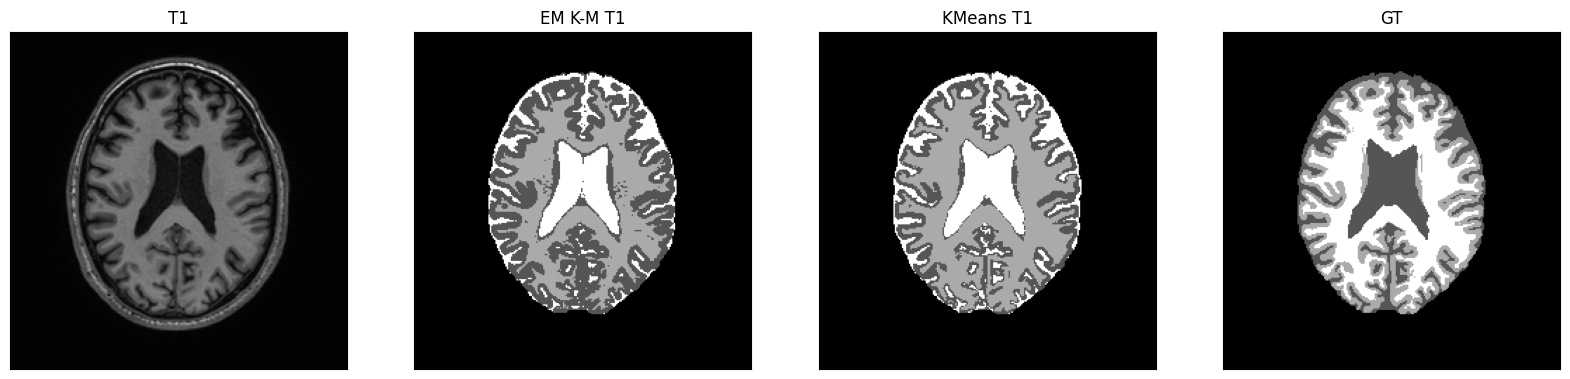

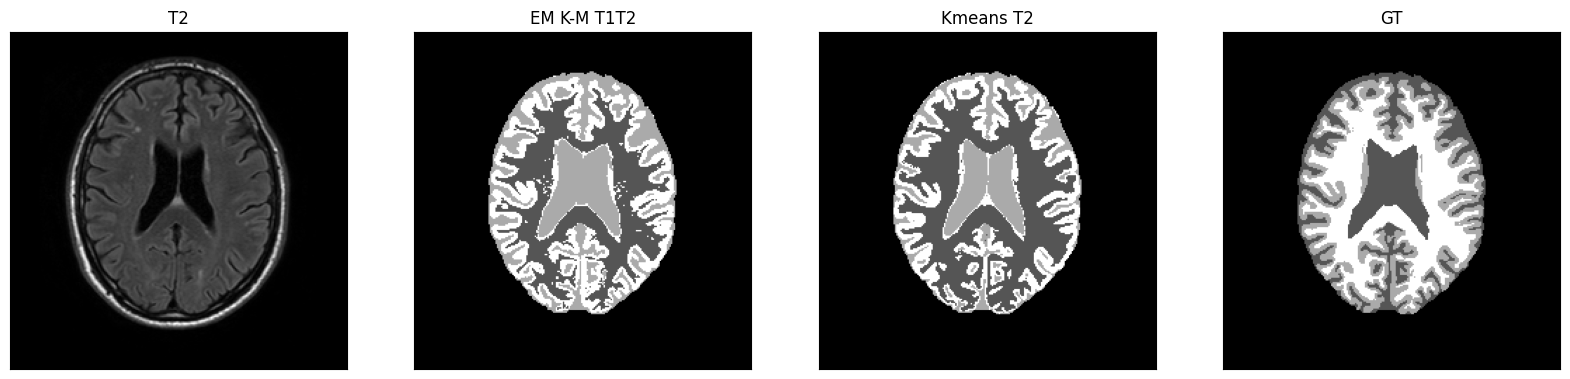

After matching areas


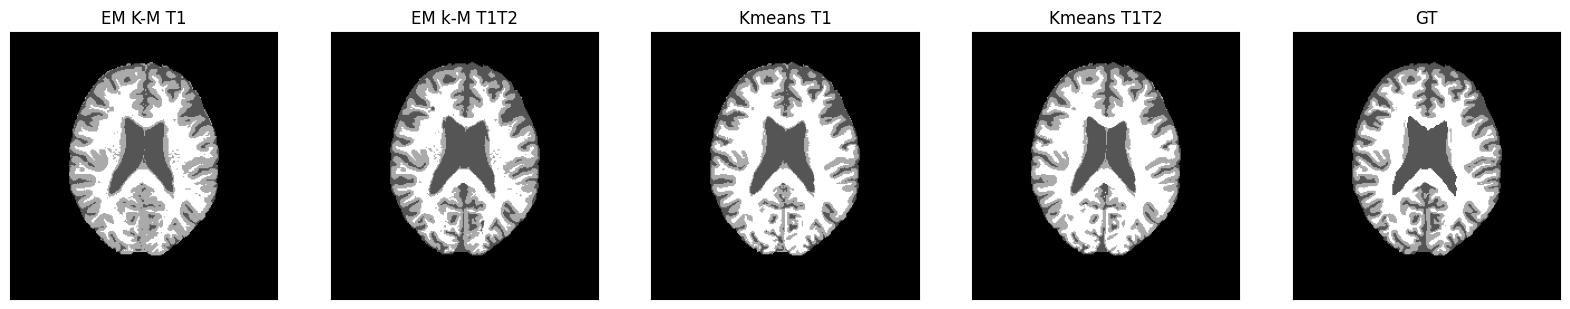

------------ Patient 1 ---------------------


T1: Expectation Maximination in progress with knn init:  39%|███▉      | 39/100 [00:06<00:10,  6.03it/s]
T1+T2: Expectation Maximination in progress with knn init:  62%|██████▏   | 62/100 [00:15<00:09,  4.06it/s]


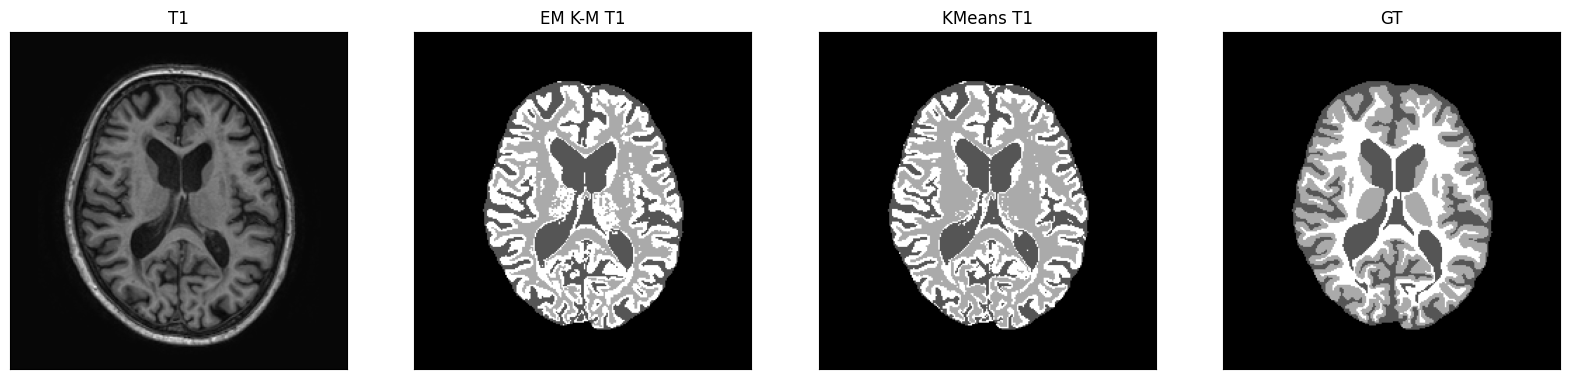

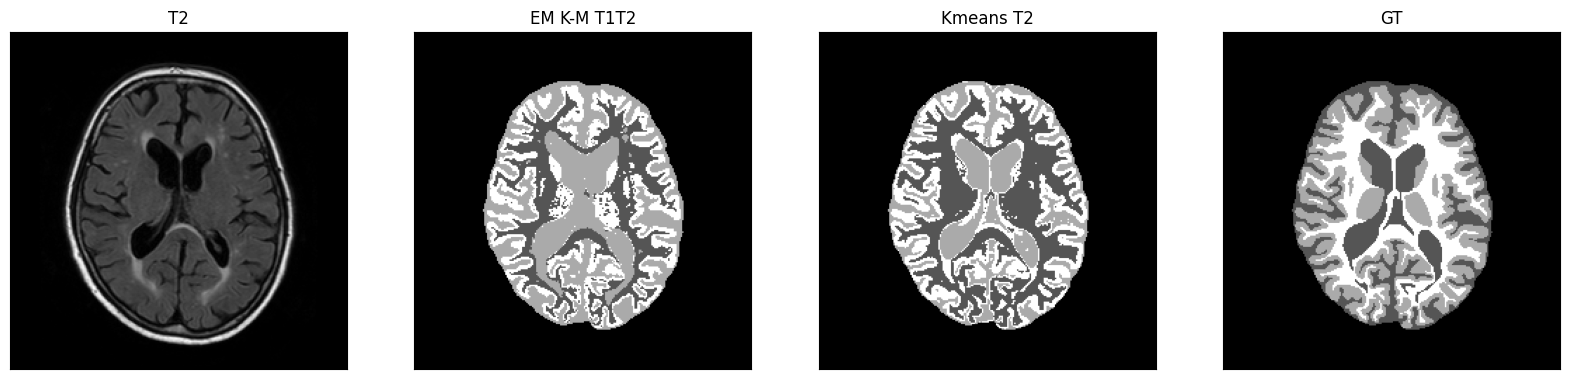

After matching areas


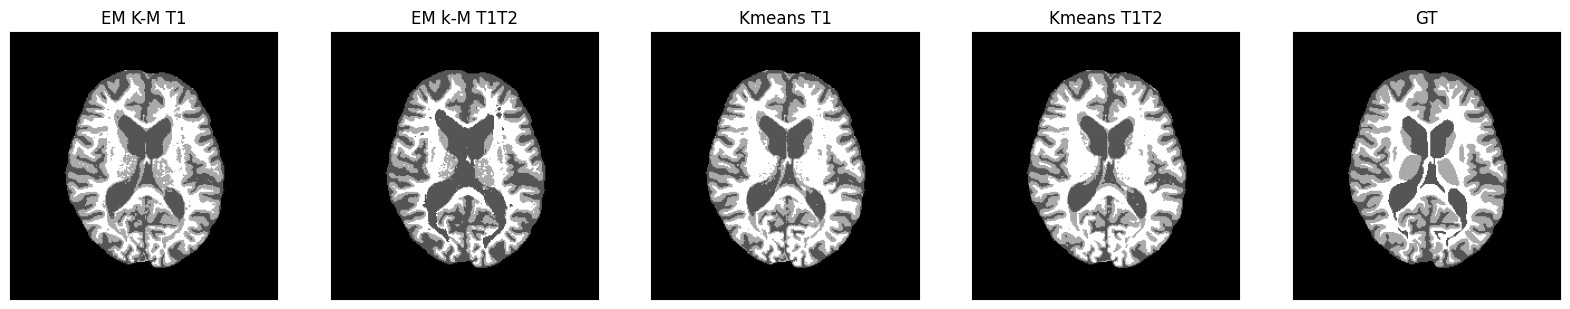

------------ Patient 2 ---------------------


T1: Expectation Maximination in progress with knn init:  59%|█████▉    | 59/100 [00:08<00:06,  6.60it/s]
T1+T2: Expectation Maximination in progress with knn init:  78%|███████▊  | 78/100 [00:17<00:04,  4.51it/s]


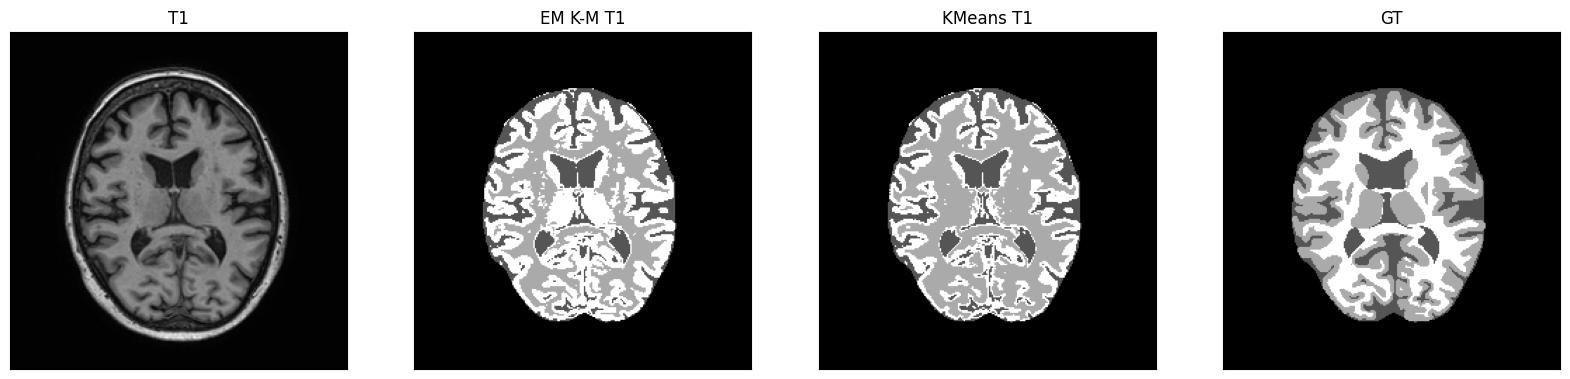

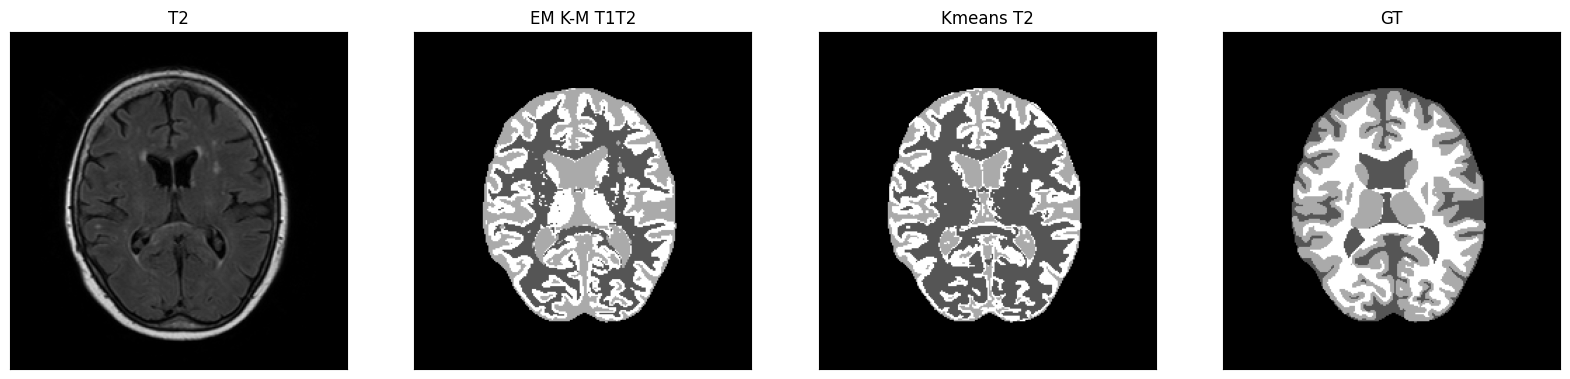

After matching areas


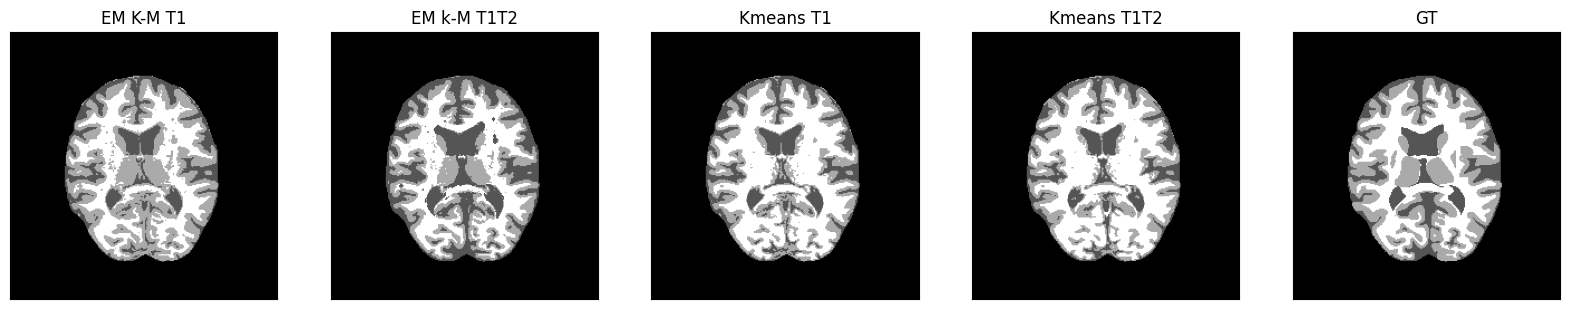

------------ Patient 3 ---------------------


T1: Expectation Maximination in progress with knn init:  55%|█████▌    | 55/100 [00:07<00:06,  7.03it/s]
T1+T2: Expectation Maximination in progress with knn init:  52%|█████▏    | 52/100 [00:10<00:09,  4.95it/s]


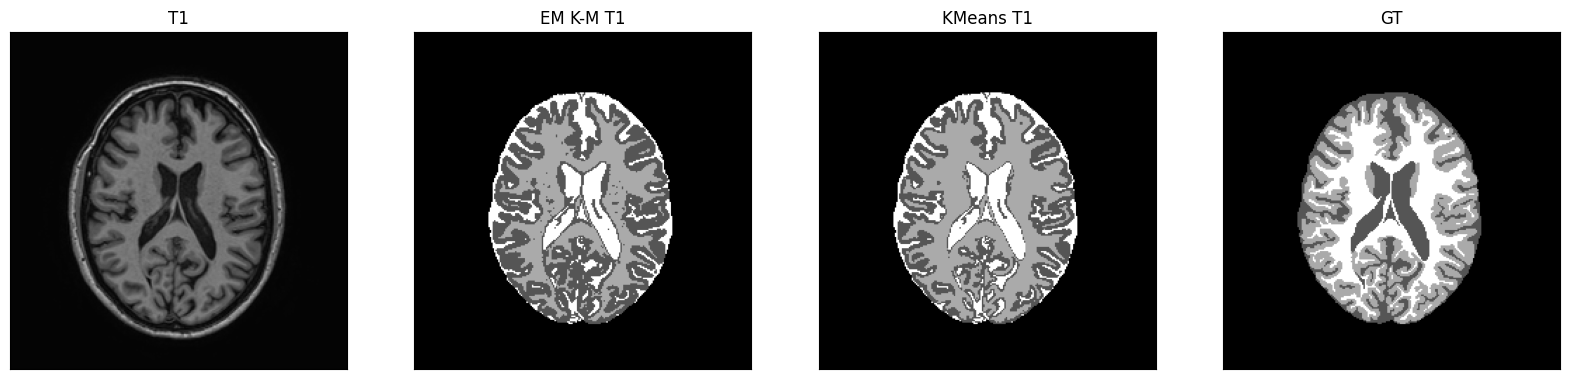

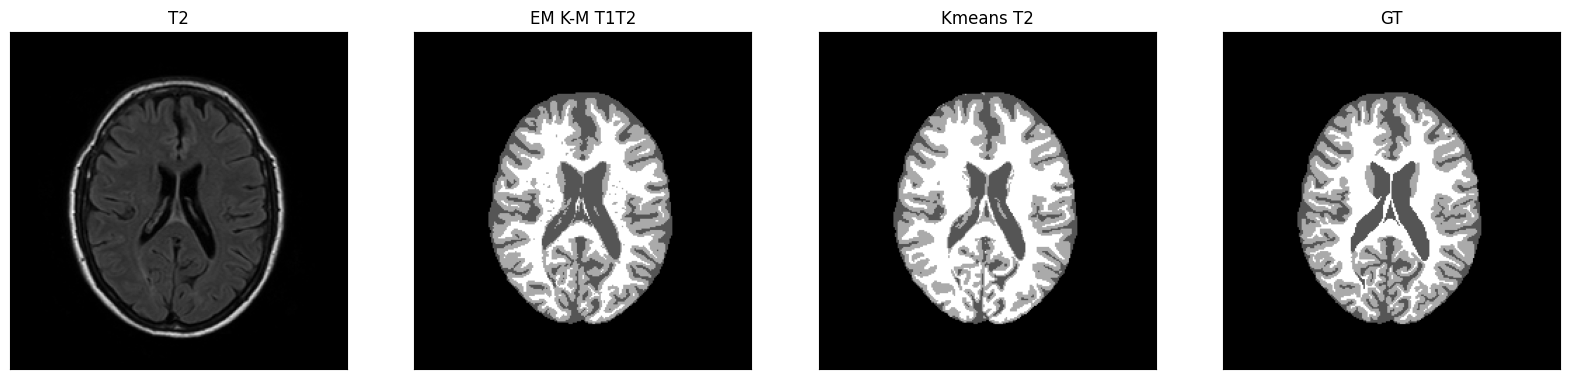

After matching areas


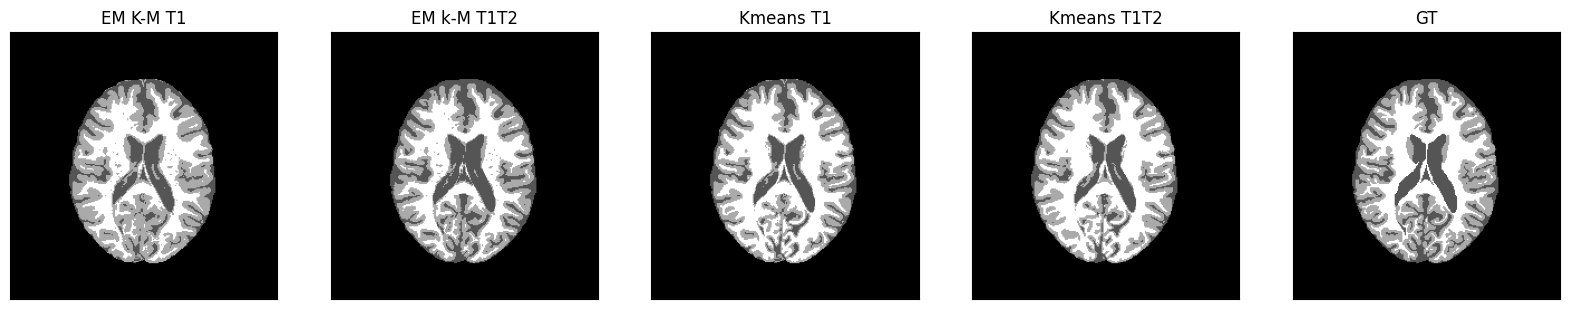

------------ Patient 4 ---------------------


T1: Expectation Maximination in progress with knn init:  55%|█████▌    | 55/100 [00:07<00:06,  6.89it/s]
T1+T2: Expectation Maximination in progress with knn init:  57%|█████▋    | 57/100 [00:13<00:10,  4.13it/s]


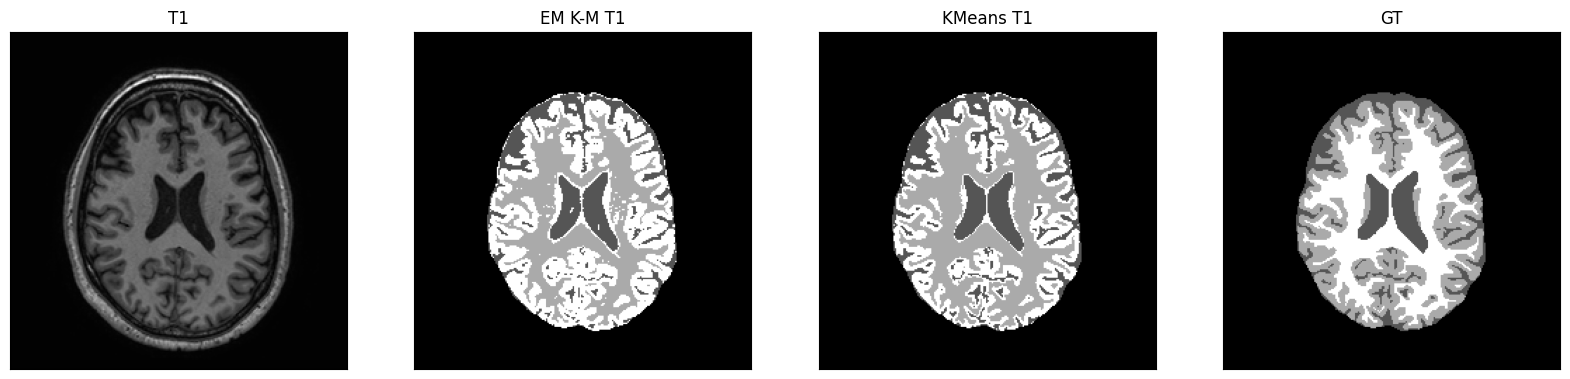

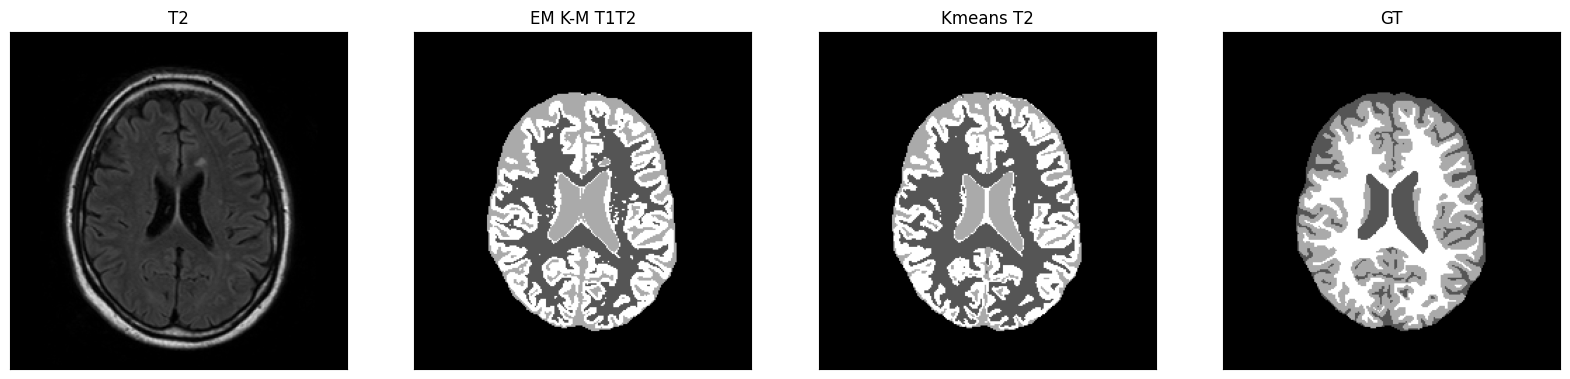

After matching areas


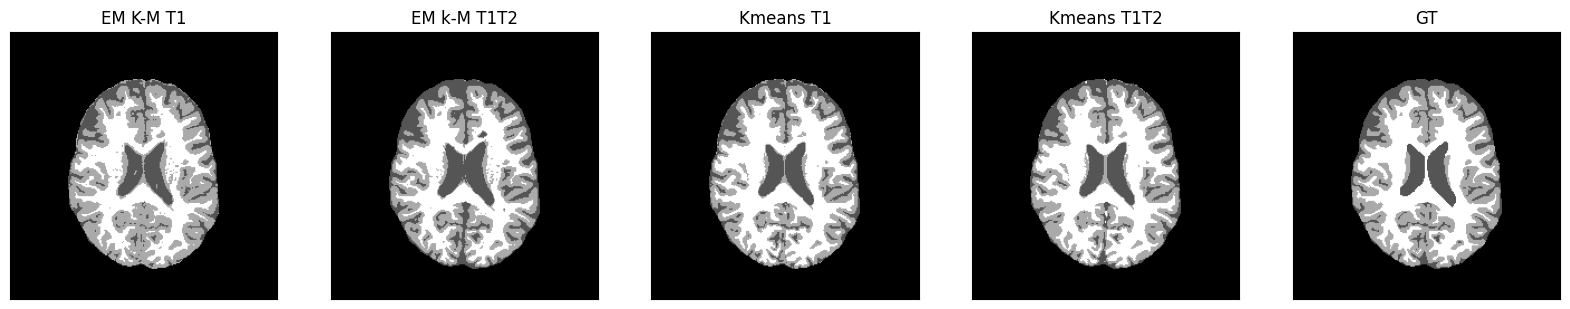

CSF        GM        WM Modalities  Subject   Model       Init  \
0   0.984489  0.666362  0.907930         T1        0      EM  kmeans_EM   
1   0.896963  0.807961  0.910061      T1+T2        0      EM  kmeans_EM   
2   0.964438  0.746297  0.728764         T1        0  Kmeans       none   
3   0.976353  0.701331  0.702326      T1+T2        0  Kmeans       none   
4   0.829847  0.812013  0.805731         T1        1      EM  kmeans_EM   
5   0.680543  0.883609  0.834169      T1+T2        1      EM  kmeans_EM   
6   0.873517  0.809557  0.682868         T1        1  Kmeans       none   
7   0.903608  0.804865  0.658559      T1+T2        1  Kmeans       none   
8   0.940635  0.688916  0.935175         T1        2      EM  kmeans_EM   
9   0.788584  0.793773  0.936404      T1+T2        2      EM  kmeans_EM   
10  0.929586  0.749134  0.778795         T1        2  Kmeans       none   
11  0.953908  0.711457  0.747920      T1+T2        2  Kmeans       none   
12  0.969023  0.756022  0.860056         T1        3      EM  kmeans_EM   
13  0.898318  0.850453  0.864272      T1+T2        3      EM  kmeans_EM   
14  0.962585  0.767508  0.672809         T1        3  Kmeans       none   
15  0.975814  0.750911  0.661470      T1+T2        3  Kmeans       none   
16  0.933575  0.791407  0.930722         T1        4      EM  kmeans_EM   
17  0.803262  0.882297  0.928584      T1+T2        4      EM  kmeans_EM   
18  0.884448  0.867196  0.766735         T1        4  Kmeans       none   
19  0.916359  0.866546  0.750862      T1+T2        4  Kmeans       none   

         Time  
0    9.409258  
1   15.702768  
2    0.651914  
3    2.537840  
4    6.530836  
5   15.480804  
6    0.735660  
7    3.415846  
8    9.013613  
9   17.465076  
10   0.634560  
11   2.267620  
12   7.890402  
13  10.645361  
14   0.526452  
15   2.436316  
16   8.043582  
17  13.988451  
18   1.124460  
19   2.302278

In [11]:

t1_seg, t2_seg = [], []
results = []

for i in range(5):
    print(f'------------ Patient {i} ---------------------')

    # Read images
    t1 = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'T1.nii'))
    t2 = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'T2_FLAIR.nii'))
    brain_mask = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'brainMask.nii'))
    ground_truth = sitk.ReadImage(os.path.join('..', 'P2_Data', f'{i}', 'LabelsForTesting.nii'))

    # Convert images to arrays
    t1_array = sitk.GetArrayFromImage(t1)
    t2_array = sitk.GetArrayFromImage(t2)
    brain_mask_array = sitk.GetArrayFromImage(brain_mask)
    ground_truth_array = sitk.GetArrayFromImage(ground_truth)

    # Perform EM tissue segmentation
    t1_segmentation, t2_segmentation, t1_segmentation_time, t2_segmentation_time = EM.tissue_segmentation(
        t1_array, t2_array, brain_mask_array)
    t1_segmentation_k_means, t2_segmentation_k_means, t1_segmentation_time_k_means, t2_segmentation_time_k_means = EM.tissue_segmentation(
        t1_array, t2_array, brain_mask_array, operation='Kmeans')

    # Match predictions with ground truth
    wm_t1, gm_t1, cfs_t1 = EM.match_pred_with_gt(t1_segmentation, ground_truth_array)
    wm_t2, gm_t2, cfs_t2 = EM.match_pred_with_gt(t2_segmentation, ground_truth_array)
    wm_t1_kmeans, gm_t1_kmeans, cfs_t1_kmeans = EM.match_pred_with_gt(t1_segmentation_k_means, ground_truth_array)
    wm_t2_kmeans, gm_t2_kmeans, cfs_t2_kmeans = EM.match_pred_with_gt(t2_segmentation_k_means, ground_truth_array)

    # Display plots
    volumes = [t1_array, t1_segmentation, t1_segmentation_k_means, ground_truth_array]
    names = ['T1', 'EM K-M T1', 'KMeans T1', 'GT']
    EM.get_plots(volumes, names)

    volumes = [t2_array, t2_segmentation, t2_segmentation_k_means, ground_truth_array]
    names = ['T2', 'EM K-M T1T2', 'Kmeans T2', 'GT']
    EM.get_plots(volumes, names)

    print('After matching areas')

    t1_s_m = wm_t1 + gm_t1 + cfs_t1
    t2_s_m = wm_t2 + gm_t2 + cfs_t2
    t1_s_kmeans_m = wm_t1_kmeans + gm_t1_kmeans + cfs_t1_kmeans
    t2_s_kmeans_m = wm_t2_kmeans + gm_t2_kmeans + cfs_t2_kmeans

    volumes = [t1_s_m, t2_s_m, t1_s_kmeans_m, t2_s_kmeans_m, ground_truth_array]
    names = ['EM K-M T1', 'EM k-M T1T2', 'Kmeans T1', 'Kmeans T1T2', 'GT']
    EM.get_plots(volumes, names)
    
    # Calculate Dice scores and store results
    results.append(EM.dice_score(ground_truth_array, t1_s_m) + ['T1', i, 'EM', 'kmeans_EM', t1_segmentation_time])
    results.append(EM.dice_score(ground_truth_array, t2_s_m) + ['T1+T2', i, 'EM', 'kmeans_EM', t2_segmentation_time])
    results.append(EM.dice_score(ground_truth_array, t1_s_kmeans_m) + ['T1', i, 'Kmeans', 'none', t1_segmentation_time_k_means])
    results.append(EM.dice_score(ground_truth_array, t2_s_kmeans_m) + ['T1+T2', i, 'Kmeans', 'none', t2_segmentation_time_k_means])

# Create a dataframe to store the results
labels = ['CSF', 'GM', 'WM', 'Modalities', 'Subject', 'Model', 'Init', 'Time']
results = pd.DataFrame(data=results, columns=labels)
results


In [12]:
df = pd.melt(results, id_vars=['Modalities', 'Subject', 'Model', 'Init', 'Time'], value_vars=['CSF', 'GM', 'WM'], ignore_index=False)
df['Model'] = df['Model'].str.upper()
df.columns = ['Modalities', 'Subject', 'Model', 'Init', 'Time', 'Tissue', 'Dice']

df

Modalities  Subject   Model       Init       Time Tissue      Dice
0          T1        0      EM  kmeans_EM   9.409258    CSF  0.984489
1       T1+T2        0      EM  kmeans_EM  15.702768    CSF  0.896963
2          T1        0  KMEANS       none   0.651914    CSF  0.964438
3       T1+T2        0  KMEANS       none   2.537840    CSF  0.976353
4          T1        1      EM  kmeans_EM   6.530836    CSF  0.829847
5       T1+T2        1      EM  kmeans_EM  15.480804    CSF  0.680543
6          T1        1  KMEANS       none   0.735660    CSF  0.873517
7       T1+T2        1  KMEANS       none   3.415846    CSF  0.903608
8          T1        2      EM  kmeans_EM   9.013613    CSF  0.940635
9       T1+T2        2      EM  kmeans_EM  17.465076    CSF  0.788584
10         T1        2  KMEANS       none   0.634560    CSF  0.929586
11      T1+T2        2  KMEANS       none   2.267620    CSF  0.953908
12         T1        3      EM  kmeans_EM   7.890402    CSF  0.969023
13      T1+T2        3      EM  kmeans_EM  10.645361    CSF  0.898318
14         T1        3  KMEANS       none   0.526452    CSF  0.962585
15      T1+T2        3  KMEANS       none   2.436316    CSF  0.975814
16         T1        4      EM  kmeans_EM   8.043582    CSF  0.933575
17      T1+T2        4      EM  kmeans_EM  13.988451    CSF  0.803262
18         T1        4  KMEANS       none   1.124460    CSF  0.884448
19      T1+T2        4  KMEANS       none   2.302278    CSF  0.916359
0          T1        0      EM  kmeans_EM   9.409258     GM  0.666362
1       T1+T2        0      EM  kmeans_EM  15.702768     GM  0.807961
2          T1        0  KMEANS       none   0.651914     GM  0.746297
3       T1+T2        0  KMEANS       none   2.537840     GM  0.701331
4          T1        1      EM  kmeans_EM   6.530836     GM  0.812013
5       T1+T2        1      EM  kmeans_EM  15.480804     GM  0.883609
6          T1        1  KMEANS       none   0.735660     GM  0.809557
7       T1+T2        1  KMEANS       none   3.415846     GM  0.804865
8          T1        2      EM  kmeans_EM   9.013613     GM  0.688916
9       T1+T2        2      EM  kmeans_EM  17.465076     GM  0.793773
10         T1        2  KMEANS       none   0.634560     GM  0.749134
11      T1+T2        2  KMEANS       none   2.267620     GM  0.711457
12         T1        3      EM  kmeans_EM   7.890402     GM  0.756022
13      T1+T2        3      EM  kmeans_EM  10.645361     GM  0.850453
14         T1        3  KMEANS       none   0.526452     GM  0.767508
15      T1+T2        3  KMEANS       none   2.436316     GM  0.750911
16         T1        4      EM  kmeans_EM   8.043582     GM  0.791407
17      T1+T2        4      EM  kmeans_EM  13.988451     GM  0.882297
18         T1        4  KMEANS       none   1.124460     GM  0.867196
19      T1+T2        4  KMEANS       none   2.302278     GM  0.866546
0          T1        0      EM  kmeans_EM   9.409258     WM  0.907930
1       T1+T2        0      EM  kmeans_EM  15.702768     WM  0.910061
2          T1        0  KMEANS       none   0.651914     WM  0.728764
3       T1+T2        0  KMEANS       none   2.537840     WM  0.702326
4          T1        1      EM  kmeans_EM   6.530836     WM  0.805731
5       T1+T2        1      EM  kmeans_EM  15.480804     WM  0.834169
6          T1        1  KMEANS       none   0.735660     WM  0.682868
7       T1+T2        1  KMEANS       none   3.415846     WM  0.658559
8          T1        2      EM  kmeans_EM   9.013613     WM  0.935175
9       T1+T2        2      EM  kmeans_EM  17.465076     WM  0.936404
10         T1        2  KMEANS       none   0.634560     WM  0.778795
11      T1+T2        2  KMEANS       none   2.267620     WM  0.747920
12         T1        3      EM  kmeans_EM   7.890402     WM  0.860056
13      T1+T2        3      EM  kmeans_EM  10.645361     WM  0.864272
14         T1        3  KMEANS       none   0.526452     WM  0.672809
15      T1+T2        3  KMEANS       none   2.436316     WM  0.661470
16         T1

[Text(0.5, 1.0, 'Dice per Modalities')]

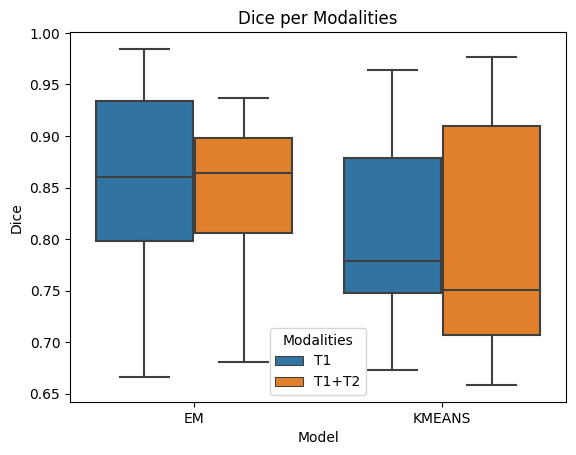

In [13]:
sns.boxplot(
    data=df, x="Model", y="Dice",hue="Modalities"
).set(title='Dice per Modalities')

[Text(0.5, 1.0, 'Time per Model')]

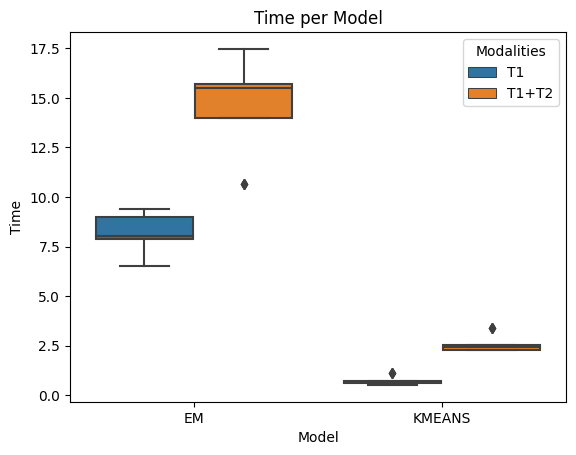

In [14]:
sns.boxplot(
    data=df, x="Model", y="Time",hue="Modalities"
).set(title="Time per Model")

[Text(0.5, 1.0, 'Dice per Tissue with T1')]

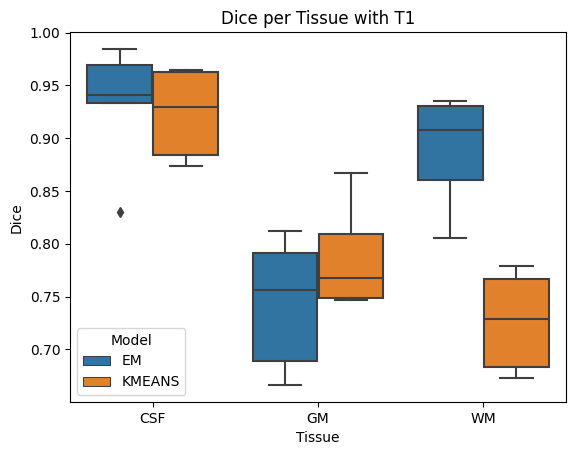

In [15]:
df_ = df.loc[df.Modalities == 'T1']
sns.boxplot(data=df_, x="Tissue", y="Dice", hue="Model").set(title="Dice per Tissue with T1")

[Text(0.5, 1.0, 'Dice per Tissue with T1')]

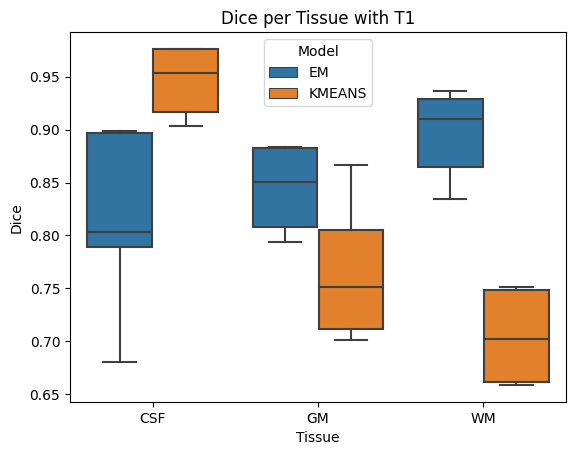

In [16]:
df_ = df.loc[df.Modalities == 'T1+T2']
sns.boxplot(data=df_, x="Tissue", y="Dice", hue="Model").set(title="Dice per Tissue with T1")